In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

* This notebook contains the complete code to apply sentiment analysis to the extrated online news related to Microsoft (MSFT).

    1. All the news have been extracted from https://business.financialpost.com/

In [1]:
import requests
import urllib
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

## 1. Split text by phrases

In [2]:
import requests
import urllib
import numpy  as np
import pandas as pd

from bs4 import BeautifulSoup

In [3]:
df2 = pd.read_pickle("data sets/microsoft_complete_text.pkl")

In [4]:
df2

,n_of_page,principal_url,internal_urls,internals_dates,internals_text
0,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/pmn/busines...,2019-08-27T09:25:03-04:00,AMSTERDAM — Microsoft is remotely collecting d...
1,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/technology/...,2015-03-18T11:01:07-04:00,"ATLANTA, Georgia – This week, over 10,000 peop..."
2,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/pmn/press-r...,2018-09-25T09:02:40-04:00,"NEW YORK — Pexip, an award-winning video conf..."
3,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/business-in...,2012-11-13T12:02:39-05:00,Microsoft’s Windows boss Steven Sinofsky is ou...
4,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/business-in...,2013-04-15T11:56:02-04:00,Microsoft is working on a smartwatch with a 1....
...,...,...,...,...,...
195,20,https://business.financialpost.com/page/20?s=m...,https://business.financialpost.com/technology/...,2012-06-19T09:52:49-04:00,Microsoft Corp’s new tablet computers are no t...
196,20,https://business.financialpost.com/page/20?s=m...,https://business.financialpost.com/technology/...,2016-10-26T12:51:56-04:00,NEW YORK CITY — Microsoft Corp on Wednesday an...
197,20,https://business.financialpost.com/page/20?s=m...,https://business.financialpost.com/technology/...,2017-01-24T11:52:37-05:00,NEW YORK — An equally divided federal appeals ...
198,20,https://business.financialpost.com/page/20?s=m...,https://business.financialpost.com/pmn/busines...,2019-04-24T16:21:42-04:00,"REDMOND, Wash. — Microsoft’s ongoing push to g..."


In [5]:
text_1 = df2["internals_text"]
text_1

0      AMSTERDAM — Microsoft is remotely collecting d...
1      ATLANTA, Georgia – This week, over 10,000 peop...
2      NEW YORK —  Pexip, an award-winning video conf...
3      Microsoft’s Windows boss Steven Sinofsky is ou...
4      Microsoft is working on a smartwatch with a 1....
                             ...                        
195    Microsoft Corp’s new tablet computers are no t...
196    NEW YORK CITY — Microsoft Corp on Wednesday an...
197    NEW YORK — An equally divided federal appeals ...
198    REDMOND, Wash. — Microsoft’s ongoing push to g...
199    CHICAGO —  Productive Edge has achieved Gold P...
Name: internals_text, Length: 200, dtype: object

In [6]:
text_1[0]

'AMSTERDAM — Microsoft is remotely collecting data from users of Windows Home and Windows Pro, in a potential breach of privacy rules, the Dutch Data Protection Agency (DPA) said on Tuesday.The DPA said it had found the practices while it was testing privacy protection changes in Windows made last year by Microsoft at the agency’s request.“Microsoft has complied with the agreements made,” DPA said. “However, the check also brought to light that Microsoft is remotely collecting other data from users. As a result, Microsoft is still potentially in breach of privacy rules.”The Dutch regulator said it had forwarded its findings to its counterpart in Ireland, where Microsoft has a headquarters.The Irish Data Protection Committee (DPC) said it had received the information from the Dutch regulators last month.“The DPC has had preliminary engagement with Microsoft and, with the assistance of the Dutch authority, we will shortly be engaging further with Microsoft to seek substantive responses o

In [7]:
def split_by_dot(x):
    return(x.split("."))

df2["internals_text_split_by_dot"] = df2["internals_text"].apply(split_by_dot) 

df2["internals_text_split_by_dot"]

0      [AMSTERDAM — Microsoft is remotely collecting ...
1      [ATLANTA, Georgia – This week, over 10,000 peo...
2      [NEW YORK —  Pexip, an award-winning video con...
3      [Microsoft’s Windows boss Steven Sinofsky is o...
4      [Microsoft is working on a smartwatch with a 1...
                             ...                        
195    [Microsoft Corp’s new tablet computers are no ...
196    [NEW YORK CITY — Microsoft Corp on Wednesday a...
197    [NEW YORK — An equally divided federal appeals...
198    [REDMOND, Wash,  — Microsoft’s ongoing push to...
199    [CHICAGO —  Productive Edge has achieved Gold ...
Name: internals_text_split_by_dot, Length: 200, dtype: object

## 1.1 Time serie index

In [8]:
df2["time"] = pd.to_datetime(df2["internals_dates"])
df2.head()

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,internals_text_split_by_dot,time
0,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/pmn/busines...,2019-08-27T09:25:03-04:00,AMSTERDAM — Microsoft is remotely collecting d...,[AMSTERDAM — Microsoft is remotely collecting ...,2019-08-27 09:25:03-04:00
1,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/technology/...,2015-03-18T11:01:07-04:00,"ATLANTA, Georgia – This week, over 10,000 peop...","[ATLANTA, Georgia – This week, over 10,000 peo...",2015-03-18 11:01:07-04:00
2,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/pmn/press-r...,2018-09-25T09:02:40-04:00,"NEW YORK — Pexip, an award-winning video conf...","[NEW YORK — Pexip, an award-winning video con...",2018-09-25 09:02:40-04:00
3,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/business-in...,2012-11-13T12:02:39-05:00,Microsoft’s Windows boss Steven Sinofsky is ou...,[Microsoft’s Windows boss Steven Sinofsky is o...,2012-11-13 12:02:39-05:00
4,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/business-in...,2013-04-15T11:56:02-04:00,Microsoft is working on a smartwatch with a 1....,[Microsoft is working on a smartwatch with a 1...,2013-04-15 11:56:02-04:00


In [9]:
df2 = df2.sort_values("time")
df2 = df2.set_index("time")
df2.head()

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,internals_text_split_by_dot
time,,,,,,
2010-04-01 14:23:00-04:00,2,https://business.financialpost.com/page/2?s=mi...,https://business.financialpost.com/technology/...,2010-04-01T14:23:00-04:00,Microsoft Corp.’s marathon legal battle with T...,"[Microsoft Corp, ’s marathon legal battle with..."
2010-04-07 08:04:00-04:00,4,https://business.financialpost.com/page/4?s=mi...,https://business.financialpost.com/investing/t...,2010-04-07T08:04:00-04:00,While Apple Inc. is providing a sneak peak of ...,"[While Apple Inc, is providing a sneak peak o..."
2010-05-11 12:20:00-04:00,7,https://business.financialpost.com/page/7?s=mi...,https://business.financialpost.com/technology/...,2010-05-11T12:20:00-04:00,Just five months left to wait for Xbox fans. ...,"[Just five months left to wait for Xbox fans, ..."
2010-05-11 14:28:00-04:00,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/technology/...,2010-05-11T14:28:00-04:00,As the US$290-million legal battle between i4i...,[As the US$290-million legal battle between i4...
2010-05-27 13:19:38-04:00,2,https://business.financialpost.com/page/2?s=mi...,https://business.financialpost.com/technology/...,2010-05-27T13:19:38-04:00,News that Apple has officially become the worl...,[News that Apple has officially become the wor...


In [10]:
df2.to_pickle("data sets/microsoft_processed_text_with_time.pkl")

# 2. Sentiment analysis by phrase

In [11]:
df2 = pd.read_pickle("data sets/microsoft_processed_text_with_time.pkl")
df2

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,internals_text_split_by_dot
time,,,,,,
2010-04-01 14:23:00-04:00,2,https://business.financialpost.com/page/2?s=mi...,https://business.financialpost.com/technology/...,2010-04-01T14:23:00-04:00,Microsoft Corp.’s marathon legal battle with T...,"[Microsoft Corp, ’s marathon legal battle with..."
2010-04-07 08:04:00-04:00,4,https://business.financialpost.com/page/4?s=mi...,https://business.financialpost.com/investing/t...,2010-04-07T08:04:00-04:00,While Apple Inc. is providing a sneak peak of ...,"[While Apple Inc, is providing a sneak peak o..."
2010-05-11 12:20:00-04:00,7,https://business.financialpost.com/page/7?s=mi...,https://business.financialpost.com/technology/...,2010-05-11T12:20:00-04:00,Just five months left to wait for Xbox fans. ...,"[Just five months left to wait for Xbox fans, ..."
2010-05-11 14:28:00-04:00,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/technology/...,2010-05-11T14:28:00-04:00,As the US$290-million legal battle between i4i...,[As the US$290-million legal battle between i4...
2010-05-27 13:19:38-04:00,2,https://business.financialpost.com/page/2?s=mi...,https://business.financialpost.com/technology/...,2010-05-27T13:19:38-04:00,News that Apple has officially become the worl...,[News that Apple has officially become the wor...
...,...,...,...,...,...,...
2020-03-27 16:49:17-04:00,7,https://business.financialpost.com/page/7?s=mi...,https://business.financialpost.com/pmn/busines...,2020-03-27T16:49:17-04:00,Microsoft Corp said on Friday it was divesting...,[Microsoft Corp said on Friday it was divestin...
2020-03-27 18:32:19-04:00,3,https://business.financialpost.com/page/3?s=mi...,https://business.financialpost.com/pmn/busines...,2020-03-27T18:32:19-04:00,Microsoft Corp on Friday said it would sell it...,[Microsoft Corp on Friday said it would sell i...
2020-03-30 13:17:20-04:00,7,https://business.financialpost.com/page/7?s=mi...,https://business.financialpost.com/pmn/busines...,2020-03-30T13:17:20-04:00,The number of people using Microsoft’s Skype v...,[The number of people using Microsoft’s Skype ...


In [12]:
def sentimental_analysis_by_phrase(y):
    
    y = list(map(lambda x: analyser.polarity_scores(x)["compound"],y))
    y = np.array(y)
    y = y[y != 0]
    return(y)

#sen_an_phrase = np.vectorize(sentimental_analysis_by_phrase)

In [13]:

text_2 = df2["internals_text_split_by_dot"][0]
text_2

['Microsoft Corp',
 '’s marathon legal battle with Toronto’s i4i Inc',
 ' appears destined for the United States Supreme Court',
 '\xa0 On Thursday, the U',
 'S',
 ' Federal Circuit Court of Appeals denied Microsoft’s petition for rehearing its patent dispute case with i4i',
 ' The Court also denied Microsoft’s request for an "en banc" hearing',
 '"This has been a long and arduous process, but this decision is a powerful reinforcement of the message that smaller enterprises and invetors who own intellectual property can and will be protected," i4i chairman Loudon Owen said in a statement emailed to the Financial Post',
 '\xa0"Microsoft yet again swung hard at i4i and we are still standing tall and ready to fight in the war against patent infringement',
 '"\xa0\xa0Microsoft officials would not say if the company planned to appeal the case to the U',
 'S',
 ' Supreme Court',
 ' “We’re disappointed with the decision," Microsoft’s director of public affairs Kevin Kutz said in a statement',

In [14]:
sentimental_analysis_by_phrase(text_2)

array([-0.2732,  0.7506, -0.6808, -0.4404,  0.9186, -0.8176,  0.5574,
       -0.4767,  0.2263])

In [15]:
df2["sentimental_analysis_split_by_dot"] = df2["internals_text_split_by_dot"].apply(sentimental_analysis_by_phrase) 

df2["sentimental_analysis_split_by_dot"]

time
2010-04-01 14:23:00-04:00    [-0.2732, 0.7506, -0.6808, -0.4404, 0.9186, -0...
2010-04-07 08:04:00-04:00             [0.128, 0.4728, -0.0258, 0.5267, -0.296]
2010-05-11 12:20:00-04:00     [0.2263, 0.4215, 0.5499, 0.3612, 0.3425, 0.4215]
2010-05-11 14:28:00-04:00    [-0.2732, 0.7506, -0.4019, 0.4404, -0.2023, 0....
2010-05-27 13:19:38-04:00    [0.3612, 0.3612, 0.3612, 0.3612, 0.5574, 0.557...
                                                   ...                        
2020-03-27 16:49:17-04:00                                    [-0.507, -0.0941]
2020-03-27 18:32:19-04:00    [-0.4588, 0.3603, 0.3612, -0.5423, -0.0941, 0....
2020-03-30 13:17:20-04:00                      [0.0772, 0.802, 0.3612, 0.6808]
2020-03-31 09:00:43-04:00    [0.7783, 0.875, 0.8481, 0.2716, 0.4767, 0.4767...
2020-04-07 09:00:22-04:00     [0.296, 0.6808, 0.2732, 0.7783, 0.6369, -0.2023]
Name: sentimental_analysis_split_by_dot, Length: 200, dtype: object

In [16]:
df2["sentimental_analysis_split_by_dot_average"] = df2["sentimental_analysis_split_by_dot"].apply(np.mean)
df2["sentimental_analysis_split_by_dot_average"]

/home/ironman/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


time
2010-04-01 14:23:00-04:00   -0.026200
2010-04-07 08:04:00-04:00    0.161140
2010-05-11 12:20:00-04:00    0.387150
2010-05-11 14:28:00-04:00    0.058018
2010-05-27 13:19:38-04:00    0.420060
                               ...   
2020-03-27 16:49:17-04:00   -0.300550
2020-03-27 18:32:19-04:00   -0.033933
2020-03-30 13:17:20-04:00    0.480300
2020-03-31 09:00:43-04:00    0.525607
2020-04-07 09:00:22-04:00    0.410483
Name: sentimental_analysis_split_by_dot_average, Length: 200, dtype: float64

# 3. Sentiment analysis applied to the complet text (online news)

In [17]:
def sentimental_analysis(y):
    
    return(analyser.polarity_scores(y)["compound"])


In [18]:
df2["sentimental_analysis_complete_text"] = df2["internals_text"].apply(sentimental_analysis) 

df2["sentimental_analysis_complete_text"]

time
2010-04-01 14:23:00-04:00    0.4118
2010-04-07 08:04:00-04:00    0.7916
2010-05-11 12:20:00-04:00    0.9540
2010-05-11 14:28:00-04:00    0.8451
2010-05-27 13:19:38-04:00    0.9789
                              ...  
2020-03-27 16:49:17-04:00   -0.5639
2020-03-27 18:32:19-04:00   -0.3464
2020-03-30 13:17:20-04:00    0.9393
2020-03-31 09:00:43-04:00    0.9962
2020-04-07 09:00:22-04:00    0.9590
Name: sentimental_analysis_complete_text, Length: 200, dtype: float64

## 4. Some Plots

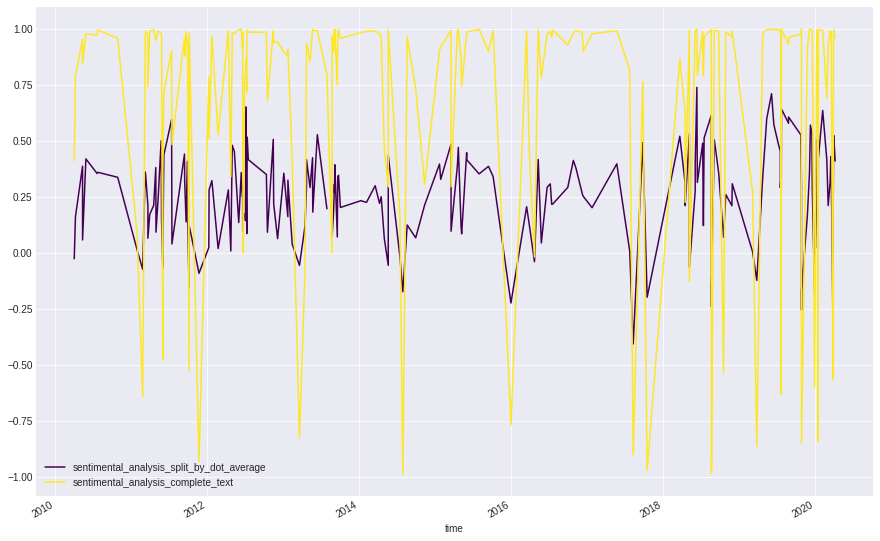

In [19]:
plt.style.use('seaborn-dark')
df2[["sentimental_analysis_split_by_dot_average","sentimental_analysis_complete_text"]].plot(cmap = "viridis",linestyle='-',figsize = (15,10))
plt.grid()
plt.show()

In [20]:
df2.to_pickle("data sets/microsoft_processed_text_with_time_and_sentiments.pkl")